### Exemplo aplicado a *Multilayer Perceptron*

**Realizando as definições**:

In [1]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from urllib2 import urlopen

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


**Definição da função para plotar as funções de custo e acurácia**:

In [2]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] ('.decode('utf-8') + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] ('.decode('utf-8') + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas'.decode('utf-8'))
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] ('.decode('utf-8') + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] ('.decode('utf-8') + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia'.decode('utf-8'))
    plt.xlabel('Épocas'.decode('utf-8'))
    plt.ylabel('Acurácia'.decode('utf-8'))
    plt.legend()
    plt.show()

**Carregamento da base de dados**:

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
filedata = urlopen(url)
data = filedata.read()
dataset = np.array([s.split(',') for s in data.split('\n')][:-1])

# Transformação dos valores de categórico para numérico
le = LabelEncoder()
features = np.array([le.fit_transform(f) for f in dataset[:, :-1].T]).T

# obtendo a coluna com as respostas
labels = le.fit_transform(dataset[:, -1])
categorical_labels = to_categorical(labels, num_classes=len(set(labels)))

**Dividindo os dados em treino, validação e teste e aplicação do algoritmo**:

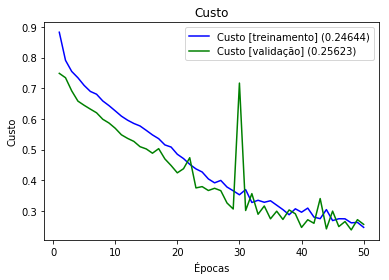

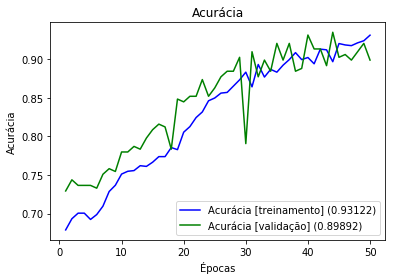

Acurácia: 90.75%
Matriz de confusão:
[[ 56   0  17   1]
 [  9   3   0   1]
 [  4   0 240   0]
 [  0   0   0  15]]

              precision    recall  f1-score   support

           0    0.81159   0.75676   0.78322        74
           1    1.00000   0.23077   0.37500        13
           2    0.93385   0.98361   0.95808       244
           3    0.88235   1.00000   0.93750        15

   micro avg    0.90751   0.90751   0.90751       346
   macro avg    0.90695   0.74278   0.76345       346
weighted avg    0.90796   0.90751   0.89788       346



In [8]:
# Dividindo em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    features, categorical_labels, test_size=0.2, shuffle=True)
# treino: 80% dos 80% de treino. teste: 20% dos 80% de treino.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=True)

l = 0.001
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=6,
                kernel_regularizer=regularizers.l2(l)))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l)))
# model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

sgd = SGD(lr=0.05)
model.compile(loss='categorical_crossentropy', optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=15, verbose=0,
                    validation_data=(X_val, y_val))
plot_history(history)
score = model.predict_classes(X_test)
y_true = [np.where(x == 1)[0][0] for x in y_test]
print 'Acurácia: %0.2f%%' % (accuracy_score(y_true, score) * 100)
print 'Matriz de confusão:'
print confusion_matrix(y_true, score)
print
print classification_report(y_true, score, digits=5)